In [7]:
%matplotlib inline
from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

#----------------------------------------------------------------------
##  BLOCK OF FUNCTIONS USED IN THE MAIN CODE
#----------------------------------------------------------------------
def initialstate(N):   
    ''' generates a random spin configuration for initial condition'''
    state = 2*np.random.randint(2, size=(N,N))-1
    return state

def mcmove(config, beta):
    '''Monte Carlo move using Metropolis algorithm '''
    for i in range(N):
        for j in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                s =  config[a, b]
                nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                cost = 2*s*nb
                if cost < 0:
                    s *= -1
                elif rand() < np.exp(-cost*beta):
                    s *= -1
                config[a, b] = s
    return config

def calcEnergy(config):
    '''Energy of a given configuration'''
    energy = 0
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -nb*S
    return energy/4.

def calcMag(config):
    '''Magnetization of a given configuration'''
    mag = np.sum(config)
    return mag
#----------------------------------------------------------------------

In [8]:
def plot_ising_grid(config, colorbar, title):
    rows = columns = len(config)
    #make a plot to show our initial conditions as a pixellated, colored contour map.
    z_min, z_max = config.min(), config.max()
    CS = plt.pcolor(np.arange(0,columns+1), np.arange(0,rows+1), config, cmap='RdBu', vmin=z_min, vmax=z_max)
    if colorbar == 'y':
        plt.colorbar(label = 'Spin')
    plt.title(title)
    #plt.savefig('Ising_initialize.jpg', bbox_inches='tight')  

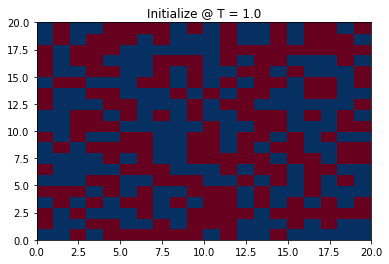

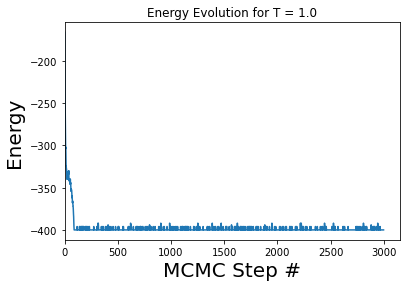

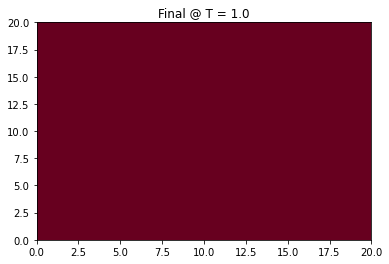

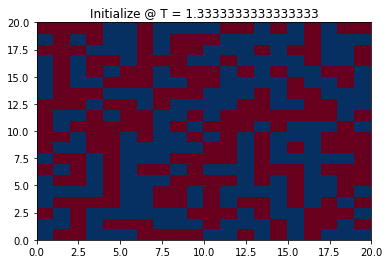

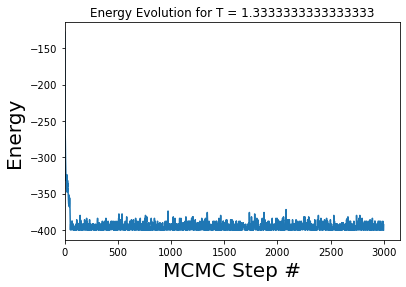

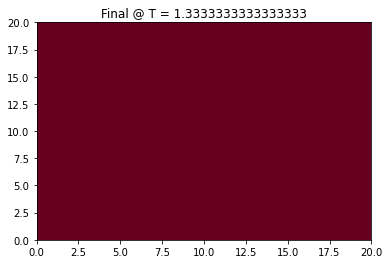

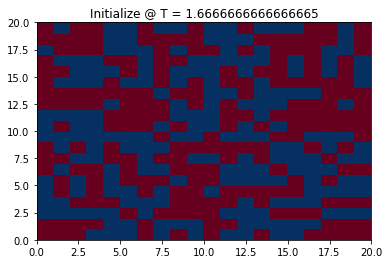

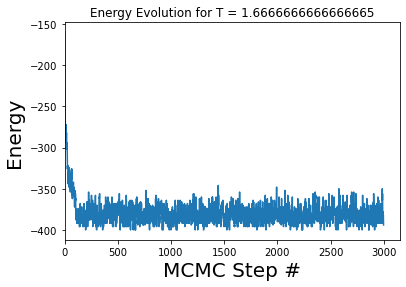

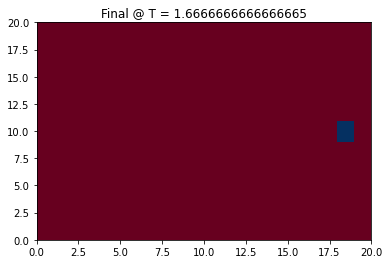

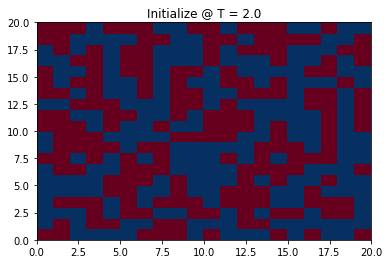

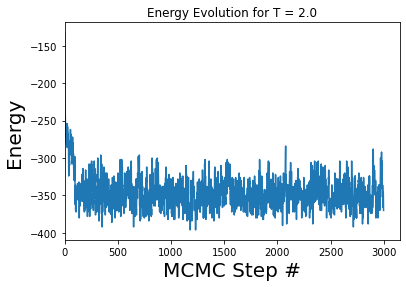

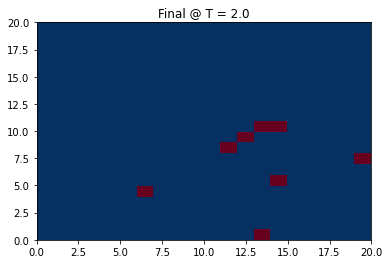

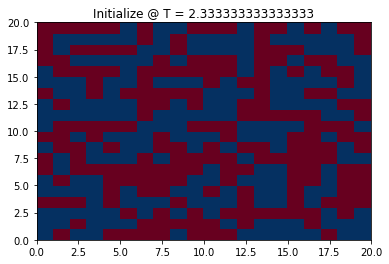

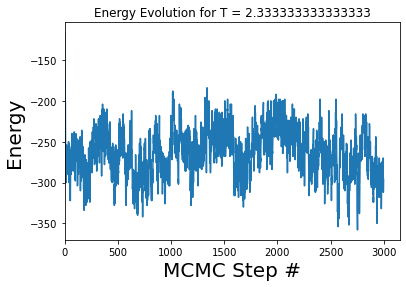

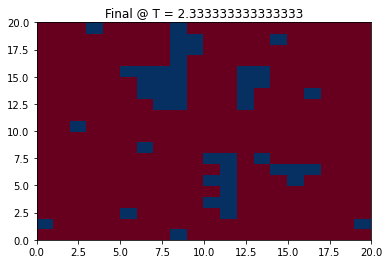

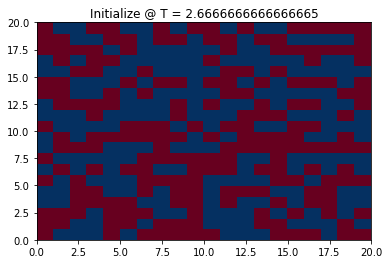

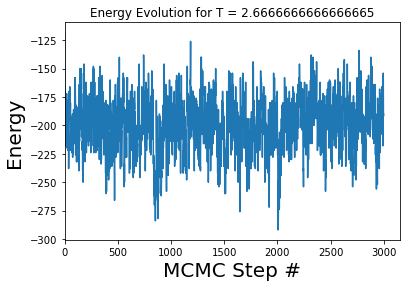

In [ ]:
#----------------------------------------------------------------------
##  MAIN PART OF THE CODE
#----------------------------------------------------------------------

## change the parameter below if you want to simulate a smaller system
nt      = 10        # number of temperature points
N       = 20         # size of the lattice, N x N
eqSteps = 0       # number of MC sweeps for equilibration
mcSteps = 3000       # number of MC sweeps for calculation

T              = np.linspace(1, 4, nt)        #temperature
Energy         = np.zeros(nt)
PickyEnergy    = np.zeros(nt)
Magnetization  = np.zeros(nt)
PickyMagnets   = np.zeros(nt)
SpecificHeat   = np.zeros(nt)
Susceptibility = np.zeros(nt)

for m in range(len(T)):
    E1 = M1 = E2 = M2 = this_PickyEnergy = this_PickyMag = 0
    Ene = np.zeros(mcSteps)
    Mag = np.zeros(mcSteps)
    config = initialstate(N)

    plot_ising_grid(config, 'no', 'Initialize @ T = '+str(T[m]))
    plt.savefig('initialize_T='+str(m)+'.png', bbox_inches='tight')
    plt.show()
    
#    for i in range(eqSteps):
#        mcmove(config, 1.0/T[m])

#        if i == 1:       plot_ising_grid(config, 'no', 'T = '+str(T[m])+' and i= '+str(i))
#        if i == 10:      plot_ising_grid(config, 'no', 'T = '+str(T[m])+' and i= '+str(i))
#        if i == 100:     plot_ising_grid(config, 'no', 'T = '+str(T[m])+' and i= '+str(i))
#        if i == 1000:    plot_ising_grid(config, 'no', 'T = '+str(T[m])+' and i= '+str(i))
#        if i == 5000:    plot_ising_grid(config, 'no', 'T = '+str(T[m])+' and i= '+str(i))
#        plt.savefig('HW8_converge_T='+str(m)+'i='+str(i)+'.png', bbox_inches='tight')
#        plt.show()
        
    for i in range(mcSteps):
        mcmove(config, 1.0/T[m])        # monte carlo moves
        this_Ene = calcEnergy(config)        # calculate the energy
        Ene[i] = this_Ene
        Mag = calcMag(config)           # calculate the magnetisation
        
        E1 = E1 + this_Ene
        M1 = M1 + Mag
        M2 = M2   + Mag*Mag ;
        E2 = E2   + this_Ene*this_Ene;

        Energy[m]         = E1/(mcSteps*N*N)
        if i > 1500: 
            this_PickyEnergy = this_PickyEnergy + this_Ene
            PickyEnergy[m] = this_PickyEnergy/((mcSteps-1500)*N*N)
            this_PickyMag = this_PickyMag + Mag
            PickyMagnets[m] = this_PickyMag/((mcSteps-1500)*N*N)
        Magnetization[m]  = M1/(mcSteps*N*N)
        SpecificHeat[m]   = ( E2/mcSteps - E1*E1/(mcSteps*mcSteps) )/(N*T[m]*T[m]);
        Susceptibility[m] = ( M2/mcSteps - M1*M1/(mcSteps*mcSteps) )/(N*T[m]);
        
        if i == 1:       
                plot_ising_grid(config, 'no', 'T = '+str(T[m])+' and i= '+str(i))
                plt.savefig('grid_T='+str(m)+'i='+str(i)+'.png', bbox_inches='tight')
        if i == 10:      
                plot_ising_grid(config, 'no', 'T = '+str(T[m])+' and i= '+str(i))
                plt.savefig('grid_T='+str(m)+'i='+str(i)+'.png', bbox_inches='tight')
        if i == 100:     
                plot_ising_grid(config, 'no', 'T = '+str(T[m])+' and i= '+str(i))
                plt.savefig('grid_T='+str(m)+'i='+str(i)+'.png', bbox_inches='tight')
        if i == 500:     
                plot_ising_grid(config, 'no', 'T = '+str(T[m])+' and i= '+str(i))
                plt.savefig('grid_T='+str(m)+'i='+str(i)+'.png', bbox_inches='tight')
        if i == 1000:    
                plot_ising_grid(config, 'no', 'T = '+str(T[m])+' and i= '+str(i))
                plt.savefig('grid_T='+str(m)+'i='+str(i)+'.png', bbox_inches='tight')
        if i == 2000:    
                plot_ising_grid(config, 'no', 'T = '+str(T[m])+' and i= '+str(i))
                plt.savefig('grid_T='+str(m)+'i='+str(i)+'.png', bbox_inches='tight')
        #plt.savefig('HW8_grid_T='+str(m)+'i='+str(i)+'.png', bbox_inches='tight')
        #plt.show()
        
    plt.plot(range(mcSteps),Ene)
#    plt.plot(range(mcSteps),PickyEnergy)
    plt.xlabel("MCMC Step #", fontsize=20);
    plt.ylabel("Energy ", fontsize=20);
    plt.title('Energy Evolution for T = '+str(T[m]))
    energy_min = np.min(Ene)
    energy_max = np.max(Ene)
    energy_diff = energy_max - energy_min
    plt.ylim(energy_min - 0.05*energy_diff, energy_max + 0.05*energy_diff)
    plt.savefig('walk_T='+str(m)+'.png', bbox_inches='tight')
    plt.show()
                
    plot_ising_grid(config, 'no', 'Final @ T = '+str(T[m]))
    plt.savefig('grid_final_T='+str(m)+'.png', bbox_inches='tight')
    plt.show()
    

#----------------------------------------------------------------------

In [ ]:
#----------------------------------------------------------------------     
# Plot the Energy, Magnetization, Specific Heat and Susceptibility
#----------------------------------------------------------------------
f = plt.figure(figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k');    

sp =  f.add_subplot(2, 2, 1 );
plt.plot(T, Energy, 'o', color="#A60628", label=' Energy');
plt.plot(T, PickyEnergy, 'o', color="blue");

plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);

sp =  f.add_subplot(2, 2, 2 );
plt.plot(T, abs(Magnetization), '*', color="#348ABD", label='Magnetization');
plt.plot(T, abs(PickyMagnets), 'o', color="blue");

plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Magnetization ", fontsize=20);


sp =  f.add_subplot(2, 2, 3 );
plt.plot(T, SpecificHeat, 'd', color="black", label='Specific Heat');
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Specific Heat ", fontsize=20);


sp =  f.add_subplot(2, 2, 4 );
plt.plot(T, Susceptibility, '+', color="green", label='Specific Heat');
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Susceptibility", fontsize=20);

plt.savefig('physical_properties.png', bbox_inches='tight')

plt.show()
#plt.legend(loc='best', fontsize=15); 
#----------------------------------------------------------------------

In [ ]:
print(range)